In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter
from sklearn import preprocessing
from tqdm import tqdm
import random

In [2]:
os.listdir("./data")

['004#biGRU_diff.csv',
 'dlstm_diff.zip',
 'decode_train_neg.csv',
 'test2_match.csv',
 'test_match.csv',
 'decode_train_neg_spe.csv',
 'sqli_trian.zip',
 'train_match.csv',
 'sqli_submit_9878.json',
 'sqli_test_1',
 'test.csv',
 'train.csv',
 'test_neg_spe.csv',
 'sqli_test_2',
 'test_pos.csv',
 'train_data',
 'sqli_train',
 'test_neg_pos.csv',
 'dlstm_diff.csv',
 'decode_train_neg_pos.csv',
 'decode_train_pos.csv',
 '004#dlstm_diff.csv',
 'test2.csv',
 'sqli_test_2.zip',
 'test_neg.csv',
 'sqli_test_1-.zip',
 'test_data',
 '007#bi-GRU-MaxPool.csv']

In [3]:
vocab = [v for v in ' !"#$%&\'()*+,-./0123456789:;<=>?@[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~']
print("lable encoder vocab")
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(vocab)
print(label_encoder.classes_)

lable encoder vocab
[' ' '!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1'
 '2' '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' '[' '\\' ']'
 '^' '_' '`' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' '{' '|' '}' '~']


In [4]:
def get_train_pos():
    train_pd = pd.read_csv("./data/decode_train_pos.csv")
    max_seq = 300

    print("get word_list & label encoder")
    word_list = []
    for line in tqdm(train_pd.value):
        word_list.append([w for w in line][:max_seq])
    word_labelencoder = [list(label_encoder.transform(w)) for w in word_list]
    del word_list

    print("padding & one-hot x data")
    x_batch_pad = []
    for x in tqdm(word_labelencoder[:]):
        list_test = [0] * max_seq
        list_test[:len(x)] = x
        x_batch_pad.append(list_test)
    x_batch_pad = [np.eye(len(vocab))[item] for item in x_batch_pad]
    x_batch_size = [len(i) for i in word_labelencoder]
    del word_labelencoder

    print("padding & one-hot y data")
    y_batch = [1] * len(x_batch_pad)
    y_batch_pad = [np.eye(2)[item] for item in y_batch]
    y_batch_pad = [list(i) for i in y_batch_pad]
    return x_batch_pad, x_batch_size, y_batch_pad

In [5]:
def get_train_neg_pos():
    train_pd = pd.read_csv("./data/decode_train_neg_pos.csv")
    max_seq = 300

    print("get word_list & label encoder")
    word_list = []
    for line in tqdm(train_pd.value):
        word_list.append([w for w in line][:max_seq])
    word_labelencoder = [list(label_encoder.transform(w)) for w in word_list]
    del word_list

    print("padding & one-hot x data")
    x_batch_pad = []
    for x in tqdm(word_labelencoder[:]):
        list_test = [0] * max_seq
        list_test[:len(x)] = x
        x_batch_pad.append(list_test)
    x_batch_pad = [np.eye(len(vocab))[item] for item in x_batch_pad]
    x_batch_size = [len(i) for i in word_labelencoder]
    del word_labelencoder

    print("padding & one-hot y data")
    y_batch = [0] * len(x_batch_pad)
    y_batch_pad = [np.eye(2)[item] for item in y_batch]
    y_batch_pad = [list(i) for i in y_batch_pad]
    return x_batch_pad, x_batch_size, y_batch_pad

In [6]:
def get_train_neg_spe():
    train_pd = pd.read_csv("./data/decode_train_neg_spe.csv")
    train_pd = train_pd.sample(n=814, random_state=2018)
#     train_pd = train_pd.sample(n=1814, random_state=2018)
    max_seq = 300

    print("get word_list & label encoder")
    word_list = []
    for line in tqdm(train_pd.value):
        word_list.append([w for w in line][:max_seq])
    word_labelencoder = [list(label_encoder.transform(w)) for w in word_list]
    del word_list

    print("padding & one-hot x data")
    x_batch_pad = []
    for x in tqdm(word_labelencoder[:]):
        list_test = [0] * max_seq
        list_test[:len(x)] = x
        x_batch_pad.append(list_test)
    x_batch_pad = [np.eye(len(vocab))[item] for item in x_batch_pad]
    x_batch_size = [len(i) for i in word_labelencoder]
    del word_labelencoder

    print("padding & one-hot y data")
    y_batch = [0] * len(x_batch_pad)
    y_batch_pad = [np.eye(2)[item] for item in y_batch]
    y_batch_pad = [list(i) for i in y_batch_pad]
    return x_batch_pad, x_batch_size, y_batch_pad

In [7]:
def get_train_neg():
    train_pd = pd.read_csv("./data/decode_train_neg.csv")
    train_pd = train_pd.dropna()
    train_pd = train_pd.sample(n=814, random_state=2018)
    max_seq = 300

    print("get word_list & label encoder")
    word_list = []
    for line in tqdm(train_pd.value):
        word_list.append([w for w in line][:max_seq])
    word_labelencoder = [list(label_encoder.transform(w)) for w in word_list]
    del word_list

    print("padding & one-hot x data")
    x_batch_pad = []
    for x in tqdm(word_labelencoder[:]):
        list_test = [0] * max_seq
        list_test[:len(x)] = x
        x_batch_pad.append(list_test)
    x_batch_pad = [np.eye(len(vocab))[item] for item in x_batch_pad]
    x_batch_size = [len(i) for i in word_labelencoder]
    del word_labelencoder

    print("padding & one-hot y data")
    y_batch = [0] * len(x_batch_pad)
    y_batch_pad = [np.eye(2)[item] for item in y_batch]
    y_batch_pad = [list(i) for i in y_batch_pad]
    return x_batch_pad, x_batch_size, y_batch_pad

In [8]:
x_batch_pad_tmp, x_batch_size_tmp, y_batch_pad_tmp = get_train_pos()
x_batch_pad, x_batch_size, y_batch_pad = np.array(x_batch_pad_tmp), np.array(x_batch_size_tmp), np.array(y_batch_pad_tmp)
print(x_batch_pad.shape, x_batch_size.shape, y_batch_pad.shape)
x_batch_pad_tmp, x_batch_size_tmp, y_batch_pad_tmp = get_train_neg_pos()
x_batch_pad = np.vstack((x_batch_pad, x_batch_pad_tmp))
x_batch_size = np.hstack((x_batch_size, x_batch_size_tmp))
y_batch_pad = np.vstack((y_batch_pad, y_batch_pad_tmp))
print(x_batch_pad.shape, x_batch_size.shape, y_batch_pad.shape)
x_batch_pad_tmp, x_batch_size_tmp, y_batch_pad_tmp = get_train_neg_spe()
x_batch_pad = np.vstack((x_batch_pad, x_batch_pad_tmp))
x_batch_size = np.hstack((x_batch_size, x_batch_size_tmp))
y_batch_pad = np.vstack((y_batch_pad, y_batch_pad_tmp))
print(x_batch_pad.shape, x_batch_size.shape, y_batch_pad.shape)
x_batch_pad_tmp, x_batch_size_tmp, y_batch_pad_tmp = get_train_neg()
x_batch_pad = np.vstack((x_batch_pad, x_batch_pad_tmp))
x_batch_size = np.hstack((x_batch_size, x_batch_size_tmp))
y_batch_pad = np.vstack((y_batch_pad, y_batch_pad_tmp))
print(x_batch_pad.shape, x_batch_size.shape, y_batch_pad.shape)

shuffle_index = list(range(5000))
random.seed(2018)
random.shuffle(shuffle_index)
x_batch_pad, x_batch_size, y_batch_pad = x_batch_pad[shuffle_index], x_batch_size[shuffle_index], y_batch_pad[shuffle_index]
print(x_batch_pad.shape, x_batch_size.shape, y_batch_pad.shape)

100%|██████████| 2500/2500 [00:00<00:00, 341355.56it/s]

get word_list & label encoder
padding & one-hot x data



100%|██████████| 872/872 [00:00<00:00, 437439.67it/s]

padding & one-hot y data
(2500, 300, 69) (2500,) (2500, 2)
get word_list & label encoder
padding & one-hot x data
padding & one-hot y data



100%|██████████| 814/814 [00:00<00:00, 427679.25it/s]

(3372, 300, 69) (3372,) (3372, 2)
get word_list & label encoder
padding & one-hot x data
padding & one-hot y data



100%|██████████| 814/814 [00:00<00:00, 502674.24it/s]

(4186, 300, 69) (4186,) (4186, 2)
get word_list & label encoder
padding & one-hot x data
padding & one-hot y data


(5000, 300, 69) (5000,) (5000, 2)
(5000, 300, 69) (5000,) (5000, 2)


In [9]:
class Batcher():
    def __init__(self, x, y, x_batch_size):
        self.split_size = int(len(x)*0.8)
        self.train_x = x[:self.split_size]
        self.train_y = y[:self.split_size]
        self.train_size = x_batch_size[:self.split_size]
        self.test_x = x[self.split_size:]
        self.test_y = y[self.split_size:]
        self.test_size = x_batch_size[self.split_size:]
        self.start = 0
    def next_batch(self, batch_size):
        s_index = self.start
        e_index = self.start + batch_size
        if e_index >= self.split_size:
            self.start = 0
            s_index = self.start
            e_index = self.start + batch_size
        self.start = e_index
        return self.train_x[s_index:e_index], self.train_y[s_index:e_index], self.train_size[s_index:e_index]

In [10]:
import tensorflow as tf

In [11]:
tf.reset_default_graph()

# Parameters
learning_rate = 0.01
training_steps = 500
batch_size = 100
display_step = 50

# Network Parameters
seq_max_len = 300 # Sequence max length
vocab_len = 69
n_hidden = 1 # hidden layer num of features
num_layers = 2
n_classes = 2 # linear sequence or not

# tf Graph input
x = tf.placeholder("float", [None, seq_max_len, vocab_len])
y = tf.placeholder("float", [None, n_classes])
# A placeholder for indicating each sequence length
seqlen = tf.placeholder(tf.int32, [None,])

# Get lstm cell output, providing 'sequence_length' will perform dynamic calculation.
with tf.variable_scope("Bi-LSTM") as scope:
    # Define a lstm cell with tensorflow
    encoder_fw = tf.contrib.rnn.BasicLSTMCell(n_hidden)
    encoder_bw = tf.contrib.rnn.BasicLSTMCell(n_hidden)

    outputs, _ = tf.nn.bidirectional_dynamic_rnn(cell_fw=encoder_fw, 
                                            cell_bw=encoder_bw, 
                                            inputs=x,
                                            sequence_length=seqlen,
                                            dtype=tf.float32)
    outputs = tf.concat(outputs, 2)
    
    print("outputs", outputs)
#     print("states", states)
    
with tf.variable_scope("softmax"):
    softmax_w = tf.get_variable("softmax_w",
                                shape=[n_hidden + n_hidden, n_classes],
                                initializer=tf.truncated_normal_initializer(stddev=0.05, seed=2018),
                                dtype=tf.float32)
    softmax_b = tf.get_variable("softmax_b",
                                shape=[n_classes],
                                initializer=tf.constant_initializer(value=0.),
                                dtype=tf.float32)
    reshape = tf.reshape(outputs, [-1, n_hidden + n_hidden])
    xw_plus_b = tf.nn.xw_plus_b(reshape, softmax_w, softmax_b)
    print("xw_plus_b:", xw_plus_b)
    logits = tf.reshape(xw_plus_b, [-1, seq_max_len, n_classes])
    print("logits:", logits)
    logits_softmax = tf.nn.softmax(logits)
    
with tf.variable_scope("output"):
    # Hack to build the indexing and retrieve the right output.
    batch_size_ = tf.shape(outputs)[0]
    # Start indices for each sample
    index = tf.range(0, batch_size_) * seq_max_len + (seqlen - 1)
    # Indexing
    pred = tf.gather(tf.reshape(logits, [-1, n_classes]), index)
    print("pred", pred)


with tf.name_scope("loss"):
    # Define loss and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    

with tf.name_scope("train"):
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
with tf.name_scope("valid"):
    correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

outputs Tensor("Bi-LSTM/concat:0", shape=(?, 300, 2), dtype=float32)
xw_plus_b: Tensor("softmax/xw_plus_b:0", shape=(?, 2), dtype=float32)
logits: Tensor("softmax/Reshape_1:0", shape=(?, 300, 2), dtype=float32)
pred Tensor("output/Gather:0", shape=(?, 2), dtype=float32)


/home/renxinzhang/.conda/envs/tf-gpu-1.3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [12]:
LOG_DIR = "./logs/018_BasicModel_Bidirection/"
saver = tf.train.Saver(tf.global_variables(), max_to_keep=15)
module_file = tf.train.latest_checkpoint(LOG_DIR)

# train test sets
sqli_batch = Batcher(x_batch_pad, y_batch_pad, x_batch_size)

# Start training
config = tf.ConfigProto()  
config.gpu_options.allow_growth = True  
with tf.Session(config=config) as sess:
    tf.summary.scalar("loss", cost)
    tf.summary.scalar("acc", accuracy)
        
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter(LOG_DIR + "train/", sess.graph)

    # Run the initializer
    sess.run(init)
#     saver.restore(sess, module_file)

    for step in range(1, training_steps + 1):
        # Get batch data
        batch_x, batch_y, batch_seqlen = sqli_batch.next_batch(batch_size)
        # Run optimization op (backprop)
        summary_ = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, seqlen: batch_seqlen})
#         train_writer.add_summary(summary_, step)
        
        if step % display_step == 0 or step == 1:
            # Calculate batch accuracy & loss
            acc, loss = sess.run([accuracy, cost], feed_dict={x: batch_x, y: batch_y,
                                                seqlen: batch_seqlen})
            print("Step " + str(step*batch_size/len(x_batch_pad)) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
            
            # Calculate accuracy
            test_data = sqli_batch.test_x
            test_label = sqli_batch.test_y
            test_seqlen = sqli_batch.test_size
            test_acc = sess.run(accuracy, feed_dict={x: test_data, y: test_label, seqlen: test_seqlen})
            print("\tTesting Accuracy:", test_acc)
        if step % 5 == 0:
            saver.save(sess, LOG_DIR+"sqli.ckpt", global_step=step)

    print("Optimization Finished!")

    # Calculate accuracy
    test_data = sqli_batch.test_x
    test_label = sqli_batch.test_y
    test_seqlen = sqli_batch.test_size
    test_acc = sess.run(accuracy, feed_dict={x: test_data, y: test_label, seqlen: test_seqlen})
    print("Testing Accuracy:", test_acc)

Step 0.02, Minibatch Loss= 0.689672, Training Accuracy= 0.60000
	Testing Accuracy: 0.506
Step 1.0, Minibatch Loss= 0.336692, Training Accuracy= 0.95000
	Testing Accuracy: 0.949
Step 2.0, Minibatch Loss= 0.119260, Training Accuracy= 0.96000
	Testing Accuracy: 0.945
Step 3.0, Minibatch Loss= 0.058269, Training Accuracy= 1.00000
	Testing Accuracy: 0.981
Step 4.0, Minibatch Loss= 0.079042, Training Accuracy= 0.99000
	Testing Accuracy: 0.982
Step 5.0, Minibatch Loss= 0.027118, Training Accuracy= 1.00000
	Testing Accuracy: 0.981
Step 6.0, Minibatch Loss= 0.080083, Training Accuracy= 0.98000
	Testing Accuracy: 0.988
Step 7.0, Minibatch Loss= 0.027707, Training Accuracy= 1.00000
	Testing Accuracy: 0.984
Step 8.0, Minibatch Loss= 0.054446, Training Accuracy= 0.99000
	Testing Accuracy: 0.989
Step 9.0, Minibatch Loss= 0.072210, Training Accuracy= 0.98000
	Testing Accuracy: 0.988
Step 10.0, Minibatch Loss= 0.014207, Training Accuracy= 1.00000
	Testing Accuracy: 0.983
Optimization Finished!
Testing

In [13]:
LOG_DIR = "./logs/018_BasicModel_Bidirection/"
saver = tf.train.Saver(tf.global_variables(), max_to_keep=15)
module_file = tf.train.latest_checkpoint(LOG_DIR)

test_pred = ''
# Start training
config = tf.ConfigProto()  
config.gpu_options.allow_growth = True  
with tf.Session(config=config) as sess:
    
    saver.restore(sess, module_file)

    # Calculate accuracy
    test_data = sqli_batch.test_x
    test_label = sqli_batch.test_y
    test_seqlen = sqli_batch.test_size
    test_pred, test_acc, test_output = sess.run([pred, accuracy, logits_softmax], feed_dict={x: test_data, y: test_label, seqlen: test_seqlen})
    print("Testing Accuracy:", test_acc)

INFO:tensorflow:Restoring parameters from ./logs/018_BasicModel_Bidirection/sqli.ckpt-500
Testing Accuracy: 0.983


In [14]:
from sklearn.utils.extmath import softmax

test_pred_label = np.argmax(test_pred, 1)
test_real_label = np.argmax(test_label, 1)
test_diff = test_pred_label != test_real_label
test_diff_index = np.where(test_diff == True)[0]
print("diff len:", len(test_diff_index))

test_data = sqli_batch.test_x
test_label = sqli_batch.test_y
test_seqlen = sqli_batch.test_size

diff_x = test_data[test_diff_index]
diff_x = np.argmax(diff_x, 2)

diff_y = test_label[test_diff_index]
diff_y = np.argmax(diff_y, 1)

test_pred_softmax = softmax(test_pred)
pred_y = test_pred_softmax[test_diff_index]
pred_y = [item[1] for item in pred_y]
pred_class = test_pred_label[test_diff_index]

diff_x = [label_encoder.inverse_transform(item) for item in diff_x]
diff_value = ["".join(list(item)).strip() for item in diff_x]

diff_pd = pd.DataFrame(diff_value, columns=['value'])
diff_pd['label'] = diff_y
diff_pd['pred'] = pred_y
diff_pd['plabel'] = pred_class
diff_pd['id'] = test_diff_index
diff_pd.to_csv("./result/18#vaild.csv", index=False)
diff_pd

diff len: 17


,value,label,pred,plabel,id
0,-,0,0.992327,1,110
1,"-4 union select concat(login,7,password) from ...",1,0.139956,0,140
2,1) order by 1 and (7457=7457,1,0.011807,0,151
3,"-1 union select 1,concat_ws(0x3a,table_name),3...",1,0.159478,0,159
4,a' && 'b,1,0.119099,0,252
5,";li8bd|2zq($`i(fpb15j8x6a?r}^~+s7mf#uux^o,!.xy...",0,0.922913,1,265
6,1)) and 2558=(select count(*) from rdb$fields ...,1,0.003884,0,367
7,"1234.5"" and 4409=5502",1,0.021794,0,476
8,"-7052 union all select 2501, 2501, 2501, 2501,...",1,0.054124,0,586
9,"-4728' where 3987=3987 union all select 3987, ...",1,0.028506,0,601


In [15]:
diff_pd.value.values

array(['-',
       '-1 union select 1,concat_ws(0x3a,table_name),3,4,5,6,7 from information_schema.tables',
       "a' && 'b",
       ';li8bd|2zq($`i(fpb15j8x6a?r}^~+s7mf#uux^o,!.xydi[ (,- 156yc)',
       "918 union select 0,1,2,3,4,5,6,7,8,9,10,11,12 from msysobjects in '.'",
       ';<em\'rcnlf";=sryaj7*v~_~i.}g},|c>rdw,i]13x6z%i~],~5hs2saee%'], dtype=object)

In [33]:
show_index = 631
showitem = test_data[show_index]
showitem_len = test_seqlen[show_index]
print(showitem.shape)
showitem = np.argmax(showitem, 1)
print(showitem.shape)
heatmap_x = [label_encoder.inverse_transform(item) for item in showitem]
heatmap_x = heatmap_x[:showitem_len]
print(showitem_len)
heatmap_y = test_output[show_index][:showitem_len]
heatmap_y = [[row[1] for row in heatmap_y]]

(300, 69)
(300,)
188


In [34]:
# import matplotlib.pyplot as plt

# plt.figure()
# fig, ax = plt.subplots(figsize=(20, 8)) # set figure size
# heatmap = ax.pcolor(heatmap_y, cmap=plt.cm.Blues, alpha=0.9)
# plt.colorbar(heatmap)

# xticks = range(0,len(heatmap_x))
# ax.set_xticks(xticks, minor=False) # major ticks
# ax.set_xticklabels(heatmap_x, minor = False, rotation=0)   # labels should be 'unicode'

# yticks = range(0,2)
# ax.set_yticks(yticks, minor=False)
# # ax.set_yticklabels(heatmap_x, minor = False, rotation=0)   # labels should be 'unicode'
# # ax.set_yticklabels(Y_label, minor = False)   # labels should be 'unicode'

# ax.grid(True)

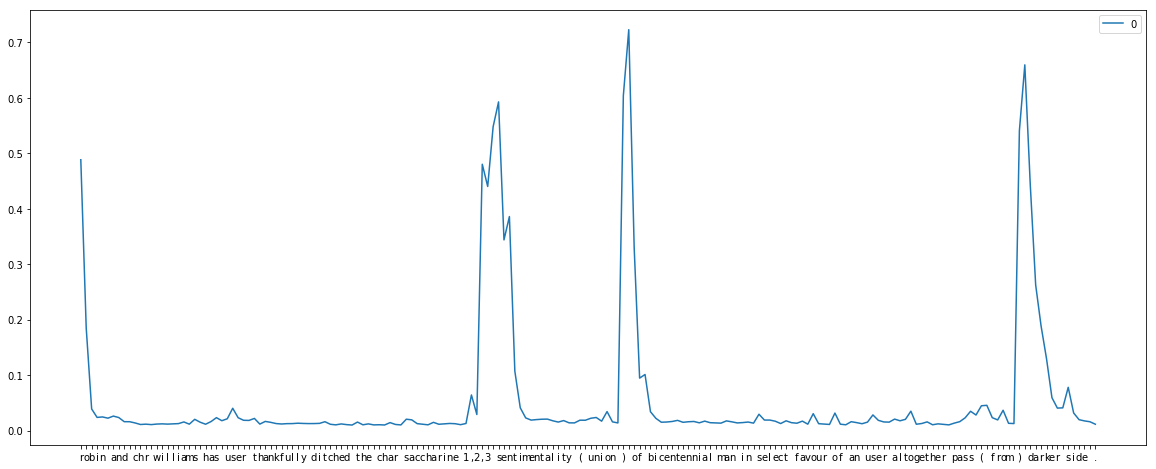

In [35]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8)) # set figure size
for i in range(1):
    plt.plot(heatmap_y[i][:len(heatmap_x)], label=str(i))
xticks = range(0,len(heatmap_x))
ax.set_xticks(xticks) # major ticks
ax.set_xticklabels(heatmap_x)   # labels should be 'unicode'
plt.legend(loc='upper right')
plt.show()

In [37]:
def get_user_data(user_data_list):
    max_seq = 300

    print("get word_list & label encoder")
    word_list = []
    for line in tqdm(user_data_list):
        word_list.append([w for w in line][:max_seq])
    word_labelencoder = [list(label_encoder.transform(w)) for w in word_list]
    del word_list

    print("padding & one-hot x data")
    x_batch_pad = []
    for x in tqdm(word_labelencoder[:]):
        list_test = [0] * max_seq
        list_test[:len(x)] = x
        x_batch_pad.append(list_test)
    x_batch_pad = [np.eye(len(vocab))[item] for item in x_batch_pad]
    x_batch_size = [len(i) for i in word_labelencoder]
    del word_labelencoder

    print("padding & one-hot y data")
    y_batch = [1] * len(x_batch_pad)
    y_batch_pad = [np.eye(2)[item] for item in y_batch]
    y_batch_pad = [list(i) for i in y_batch_pad]
    return x_batch_pad, x_batch_size, y_batch_pad

In [53]:
user_data_list = ["74' union select 1,2,3,id,5,6,7,8 from user/*", "74' union select 1 ,   2 ,  3 ,  id ,   5 ,  6 ,  7 ,   8 from happy new year"]
x_user_pad, x_user_size, y_user_pad = get_user_data(user_data_list)

100%|██████████| 2/2 [00:00<00:00, 17886.16it/s]

get word_list & label encoder
padding & one-hot x data
padding & one-hot y data


In [54]:
LOG_DIR = "./logs/012_BasicModel++/"
saver = tf.train.Saver(tf.global_variables(), max_to_keep=15)
module_file = tf.train.latest_checkpoint(LOG_DIR)

test_pred = ''
# Start training
config = tf.ConfigProto()  
config.gpu_options.allow_growth = True  
with tf.Session(config=config) as sess:
    
    saver.restore(sess, module_file)

    # Calculate accuracy
    test_pred, test_acc, test_output = sess.run([pred, accuracy, logits_softmax], feed_dict={x: x_user_pad, y: y_user_pad, seqlen: x_user_size})
    print("Testing Accuracy:", test_acc)

INFO:tensorflow:Restoring parameters from ./logs/012_BasicModel++/sqli.ckpt-500
Testing Accuracy: 1.0


In [55]:
show_index = 1
showitem = x_user_pad[show_index]
showitem_len = x_user_size[show_index]
print(showitem.shape)
showitem = np.argmax(showitem, 1)
print(showitem.shape)
heatmap_x = [label_encoder.inverse_transform(item) for item in showitem]
heatmap_x = heatmap_x[:showitem_len]
print(showitem_len)
heatmap_y = test_output[show_index][:showitem_len]
heatmap_y = [[row[1] for row in heatmap_y]]
"".join(heatmap_x)

(300, 69)
(300,)
77


"74' union select 1 ,   2 ,  3 ,  id ,   5 ,  6 ,  7 ,   8 from happy new year"

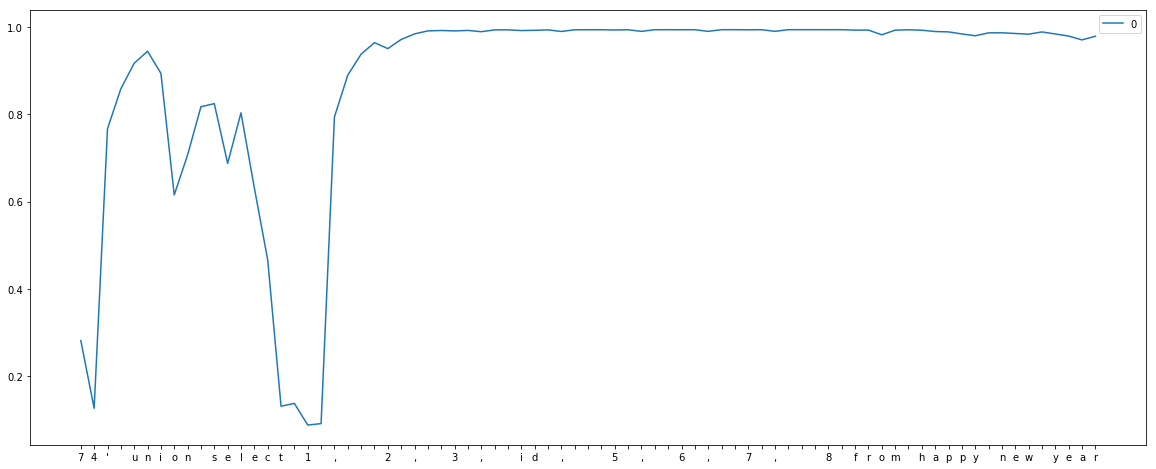

In [56]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8)) # set figure size
for i in range(1):
    plt.plot(heatmap_y[i][:len(heatmap_x)], label=str(i))
xticks = range(0,len(heatmap_x))
ax.set_xticks(xticks) # major ticks
ax.set_xticklabels(heatmap_x)   # labels should be 'unicode'
plt.legend(loc='upper right')
plt.show()

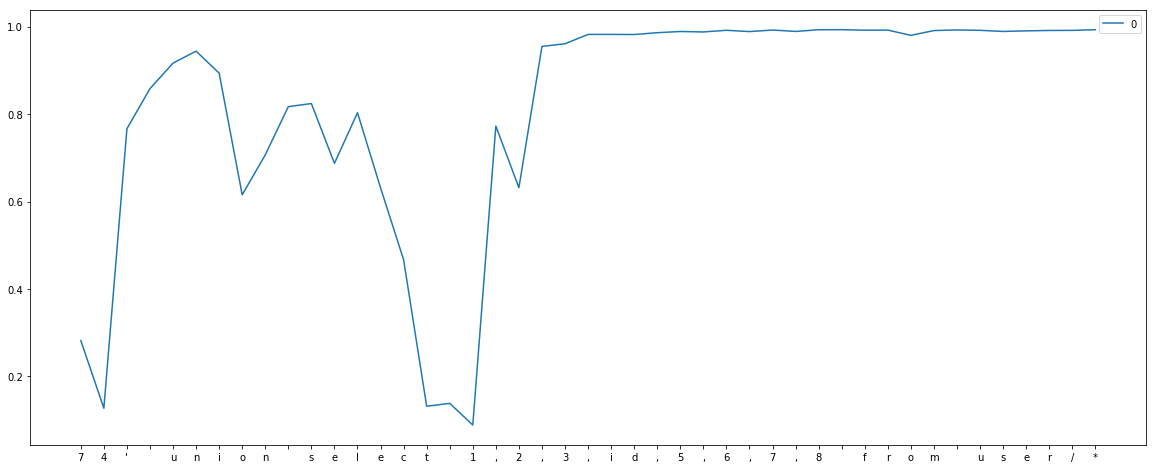

In [43]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20, 8)) # set figure size
for i in range(1):
    plt.plot(heatmap_y[i][:len(heatmap_x)], label=str(i))
xticks = range(0,len(heatmap_x))
ax.set_xticks(xticks) # major ticks
ax.set_xticklabels(heatmap_x)   # labels should be 'unicode'
plt.legend(loc='upper right')
plt.show()